# Decision Tree & Ensemble Learning

In machine learning, classification consists of using variables with known values to predict the unknown or future values of other variables. Its use cases include fraud detection (banking and insurance), spam email filter, medical diagnosis, and many other areas.

In this presentation, I will demonstrate numerous decision trees and ensemble learning algorithms to solve a real-world classification problem.

In [0]:
# import packages
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# make this notebook's output stable across runs
np.random.seed(0)

## Gini impurity and Entropy


#### Gini impurity

The CART algorithm recursively splits the training set into two subsets using a single feature k and a threshold $t_k$. The best feature and threshold are chosen to produce the purest subsets weighted by their size. **Gini impurity** measures the impurity of the data points in a set and is used to evaluate how good a split is when the CART algorithm searches for the best pair of feature and the threshold.

To compute Gini impurity for a set of items with J classes, suppose $i \in \{1, 2, \dots, J\}$ and let $p_i$ be the fraction of items labeled with class i in the set.
\begin{align}
I(p) = 1 - \sum_{i=1}^J p_i^2
\end{align}

The following function calculates the gini impurity for a given set of data points.

In [0]:
def gini_impurity(x):
    """
    This function calculate the Gini impurity for a given set of data points.

    Args:
    x: a numpy ndarray
    """
    unique, counts = np.unique(x, return_counts=True)
    probabilities = counts / sum(counts)
    gini = 1 - sum([p*p for p in probabilities])

    return gini

In [0]:
np.testing.assert_equal(0, gini_impurity(np.array([1, 1, 1])))
np.testing.assert_equal(0.5, gini_impurity(np.array([1, 0, 1, 0])))
np.testing.assert_equal(3/4, gini_impurity(np.array(['a', 'b', 'c', 'd'])))
np.testing.assert_almost_equal(2.0/3, gini_impurity(np.array([1, 2, 3, 1, 2, 3])))

#### Entropy

Another popular measure of impurity is called **entropy**, which measures the average information content of a message. Entropy is zero when all messages are identical. When it applied to CART, a set's entropy is zero when it contains instances of only one class. Entropy is calculated as follows:
\begin{align}
I(p) = - \sum_{i=1}^J p_i log_2{p_i}
\end{align}

<span style="color:orange">Below you will find the entropy function that I wrote:

In [0]:
def entropy(x):

    unique, counts = np.unique(x, return_counts=True)
    probabilities = counts / sum(counts)
    e = 0 - sum([p * math.log2(p) for p in probabilities])

    return e

In [0]:
np.testing.assert_equal(0, entropy(np.array([1, 1, 1])))
np.testing.assert_equal(1.0, entropy(np.array([1, 0, 1, 0])))
np.testing.assert_equal(2.0, entropy(np.array(['a', 'b', 'c', 'd'])))
np.testing.assert_almost_equal(1.58496, entropy(np.array([1, 2, 3, 1, 2, 3])), 4)

---

## Iris dataset

The Iris data set contains the length and width of Iris flowers of three related species (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each observation (see image below):
- Sepal.Length: sepal length in centimeters.
- Sepal.Width: sepal width in centimeters.
- Petal.Length: petal length in centimeters.
- Petal.Width: petal width in centimeters.

<table>
  <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width:250px"></td>
    <td><img src="https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg" width="250px"></td>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg" width="250px"></td>
  </tr>
  <tr>
    <td>Iris setosa</td>
    <td>Iris versicolor</td>
    <td>Iris virginica</td>
  </tr>
</table>


In [0]:
# load the iris train and test data from CSV files
train = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/iris_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/iris_test.csv')

train_x = train.iloc[:,0:4]
train_y = train.iloc[:,4]

test_x = test.iloc[:,0:4]
test_y = test.iloc[:,4]

# print the number of instances in each class
print(train_y.value_counts().sort_index())
print(test_y.value_counts().sort_index())

Iris-setosa        34
Iris-versicolor    32
Iris-virginica     39
Name: species, dtype: int64
Iris-setosa        16
Iris-versicolor    18
Iris-virginica     11
Name: species, dtype: int64


### Decision Tree Classifier

<span style="color:orange">Apply the Decision Tree classifier to classify the Iris flower data.

#### Train and visualize a simple Decision Tree

<span style="color:orange">Create a decision tree with max_depth of 2.

In [0]:
# from scikit-learn doc on DecisionTreeClassifier; train a Decision Tree with max depth of 2
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Below you can find a visualization of the decision tree just created.

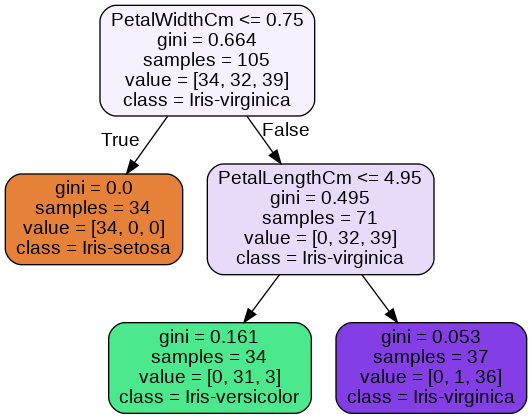

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
feature_names = train_x.columns
class_names = train_y.unique()
class_names.sort()
export_graphviz(dtc, out_file=dot_data, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Decision trees are friendly to business environments because it is easy understand the logic of the tree by looking at each node and seeing how the class is determined for each leaf.

#### Prediction with Decision tree

With this simple decision tree above, I can apply it to make predictions on the test dataset and evaluate its performance.

<span style="color:orange">Make prediction using the trained decision tree model on the test data.

In [0]:
# use the trained decision tree model to make predictions on the test data and evaluate the model performance.
train_z = dtc.predict(train_x)
train_z_prob = dtc.predict_proba(train_x)[:,1]

test_z = dtc.predict(test_x)
test_z_prob = dtc.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model confusion matrix:\n {}".format(confusion_matrix(test_y, test_z, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])))

model accuracy: 0.9111111111111111
model confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]


#### Hyper-parameters

Hyper-parameter controls the complexity of the decision tree model. For example, the deeper the tree is, the more complex patterns the model will be able to capture. In this step, I trained the decision trees with increasing number of maximum depth and plot its performance. You can see the accuracy of the training data increase as the tree grows deeper, but the accuracy on the test data might not as the model will eventually start to overfit and does not generalize well on the unseen test data.

<span style="color:orange">For each value of max_depth, I train a decision tree model and evaluate its accuracy on both train and test data, and plotted both accuracies in the figure.

In [0]:
# train the decision tree model with various max_depth, make predictions and evaluate on both train and test data.
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(train_x, train_y)

train_z = dtc.predict(train_x)
test_z = dtc.predict(test_x)

print("train model accuracy: {}".format(accuracy_score(train_y, train_z)))
print("test model accuracy: {}".format(accuracy_score(test_y, test_z)))

train model accuracy: 0.9619047619047619
test model accuracy: 0.9111111111111111


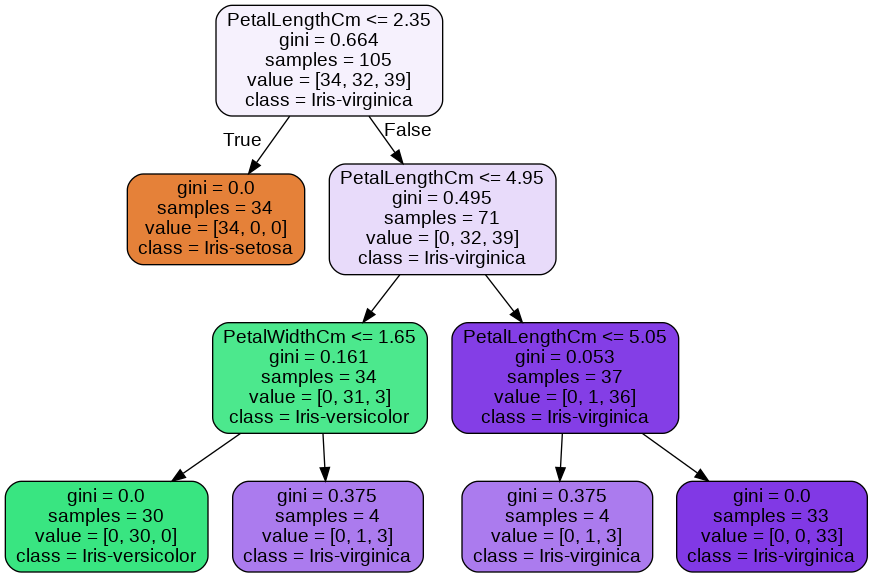

In [0]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(train_x, train_y)

dot_data = StringIO()
feature_names = train_x.columns
class_names = train_y.unique()
class_names.sort()
export_graphviz(dtc, out_file=dot_data, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
train_z = dtc.predict(train_x)
test_z = dtc.predict(test_x)

print("train model accuracy: {}".format(accuracy_score(train_y, train_z)))
print("test model accuracy: {}".format(accuracy_score(test_y, test_z)))

train model accuracy: 0.9809523809523809
test model accuracy: 0.9777777777777777


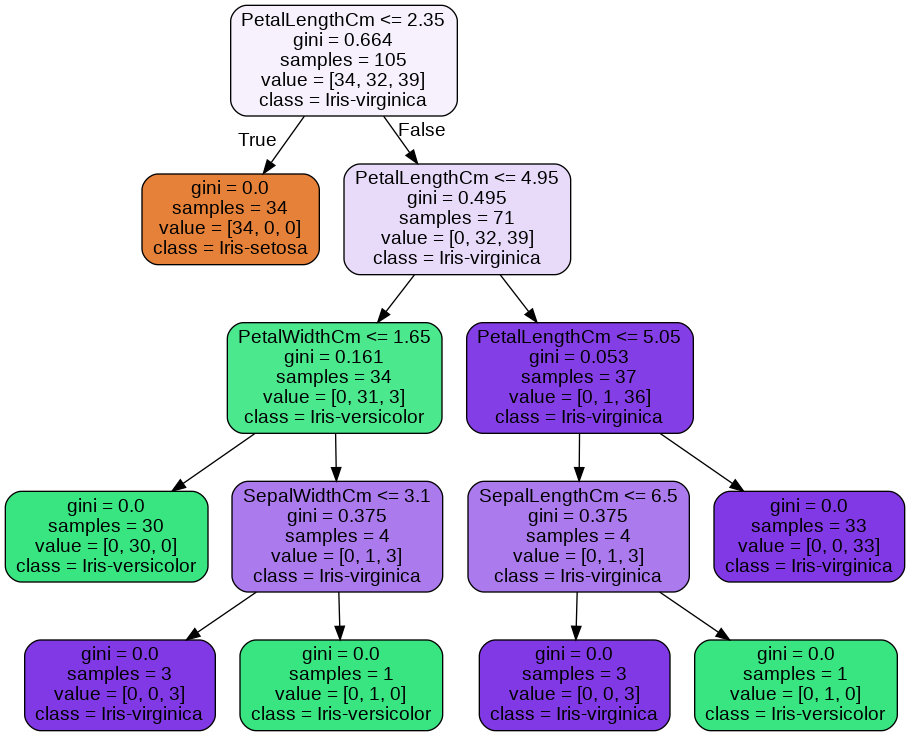

In [0]:
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(train_x, train_y)

dot_data = StringIO()
feature_names = train_x.columns
class_names = train_y.unique()
class_names.sort()
export_graphviz(dtc, out_file=dot_data, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
train_z = dtc.predict(train_x)
test_z = dtc.predict(test_x)

print("train model accuracy: {}".format(accuracy_score(train_y, train_z)))
print("test model accuracy: {}".format(accuracy_score(test_y, test_z)))

train model accuracy: 1.0
test model accuracy: 0.9777777777777777


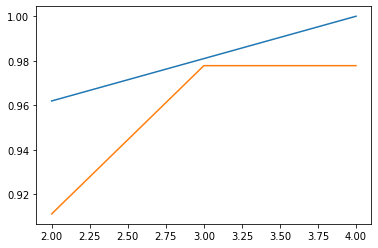

In [0]:
plt.plot([2,3,4], [0.9619047619047619, 0.9809523809523809, 1.0], [2,3,4], [0.9111111111111111, 0.9777777777777777, 0.9777777777777777])

#### Fine-tune the decision tree classifier

Sometimes simple train/test splitting of a dataset can result in a tree that overfits. To mitigate this issue, k-fold cross validation is used to resample the data. In the case below, the dataset is randomized and divided into three different samples. 

The model has been fine-tuned using the below hyper-parameters:
- **criteria**: this defines how we measure the quality of a split. we can choose either "gini" for the Gini impurity or "entropy" for the information gain.
- **max_depth**: the maximum depth of the tree. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. But meanwhile, deeper trees are more likely to overfit the data. For this practice, we will choose from {1, 2, 3} given there are only 4 features in the iris dataset.
- **min_samples_split**: This value represents the minimum number of samples required to split an internal node. The smaller this value is, the deeper the tree will grow, thus more likely to overfit. On the other hand, if the value is really large (the size of the training data in the extreme case), the tree will be very shallow and could suffer from underfit. In this practice, we choose from {0.01, 0.05, 0.1, 0.2}.

<span style="color:orange">Use grid search with 3-fold cross-validation to fine-tune the decision tree model and output the best hyper-parameters.

In [0]:
# fine-tune the model, use grid search with 3-fold cross-validation.
parameters = {
    "max_depth": [1, 2, 3], 
    "min_samples_split": [0.01, 0.05, 0.1, 0.2]
}

dt = DecisionTreeClassifier()
grid = GridSearchCV(dtc, parameters, cv=3)
grid.fit(train_x, train_y)
# summarize the results of the grid search
print("The best score is {}".format(grid.best_score_))
print("The best hyper parameter setting is {}".format(grid.best_params_))

The best score is 0.9619047619047619
The best hyper parameter setting is {'max_depth': 3, 'min_samples_split': 0.01}


#### Prediction and Evaluation

Now that I have a fine-tuned decision tree classifier based on the training data, here I apply this model to make predictions on the test data and evaluate its performance.

In [0]:
grid.predict(test_x)

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model confusion matrix:\n {}".format(confusion_matrix(test_y, test_z, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])))

model accuracy: 0.9777777777777777
model confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


### Random Forest

Here I applied Random Forest with Gridsearch to the Iris dataset and evaluated its accuracy. It is an example of an ensemble method, which takes into account the results of multiple machine learning models.

At a basic level, random forest methods consist of a large number of relatively uncorrelated models (trees) operating as a committee rather than individual  models. Random forest models are uncorrelated because the learning algorithm is limited to a random sample of features of which to search.

Random forests are an example of bootstrap aggregation (or bagging), and they are useful for reducing the variance of those algorithms that have high variance, such as decision trees.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [0]:
parameters = {
    "n_estimators": [20, 40],
    "max_depth": [1, 2, 3], 
    "min_samples_split": [0.01, 0.05, 0.1, 0.2]
}

rfc_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=0), parameters, cv=3)
rfc_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(rfc_grid.best_score_))
print("The best hyper parameter setting is {}".format(rfc_grid.best_params_))

The best score is 0.9619047619047619
The best hyper parameter setting is {'max_depth': 2, 'min_samples_split': 0.01, 'n_estimators': 40}


In [0]:
test_z = rfc_grid.predict(test_x)

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))

model accuracy: 0.9555555555555556


### Boosting
Adaboost and Gradient boosting are two examples of boosting, another type of ensemble method.

Boosting consists of building a model from training data, then creating a second model that attempts to correct eh errors from the first model. Models are added until the training set is predicted perfectly or a maximum number of models are added.

### Adaboost

Here I applied Adaboost together with Gridsearch to the Iris dataset and evaluated its accuracy.

In [0]:
parameters = {
    "n_estimators": [20, 40],
    "learning_rate": [0.01, 0.1, 1, 10]
}

adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), random_state=0)
adaboost_grid = GridSearchCV(adaboost, parameters, cv=3)
adaboost_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(adaboost_grid.best_score_))
print("The best hyper parameter setting is {}".format(adaboost_grid.best_params_))

The best score is 0.9523809523809522
The best hyper parameter setting is {'learning_rate': 0.01, 'n_estimators': 20}


In [0]:
test_z = adaboost_grid.predict(test_x)
print("model accuracy: {}".format(accuracy_score(test_y, test_z)))

model accuracy: 0.9777777777777777


### Gradient Boosting
Here I applied Boosting together with Gridsearch to the Iris dataset and evaluated its accuracy.

In [0]:
 parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.1],
    "min_samples_split": [0.01, 0.05, 0.1, 0.2],
    "max_depth":[1, 2, 3],
    "n_estimators":[100]
}

gbc_grid = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)
gbc_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(gbc_grid.best_score_))
print("The best hyper parameter setting is {}".format(gbc_grid.best_params_))

The best score is 0.9619047619047619
The best hyper parameter setting is {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 2, 'min_samples_split': 0.2, 'n_estimators': 100}


In [0]:
test_z = gbc_grid.predict(test_x)
print("model accuracy: {}".format(accuracy_score(test_y, test_z)))

model accuracy: 0.9777777777777777


In [0]:
# More information on AdaBoost and Gradient Boosting:
https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/

---